In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [3]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [15]:
from scipy import stats

In [6]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\DSingh\AppData\Local\Temp\ipykernel_7896\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Age QQ Plot')

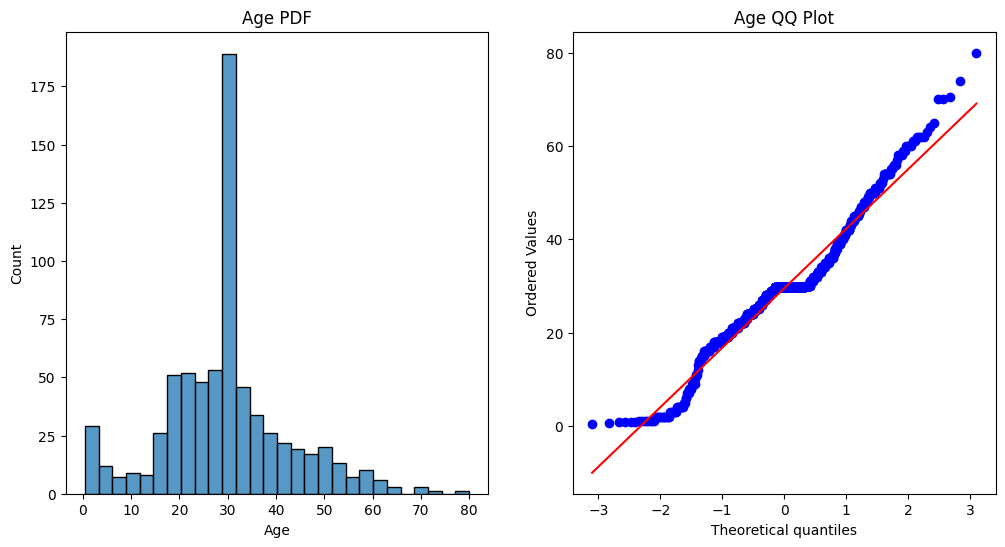

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

Text(0.5, 1.0, 'Fare QQ Plot')

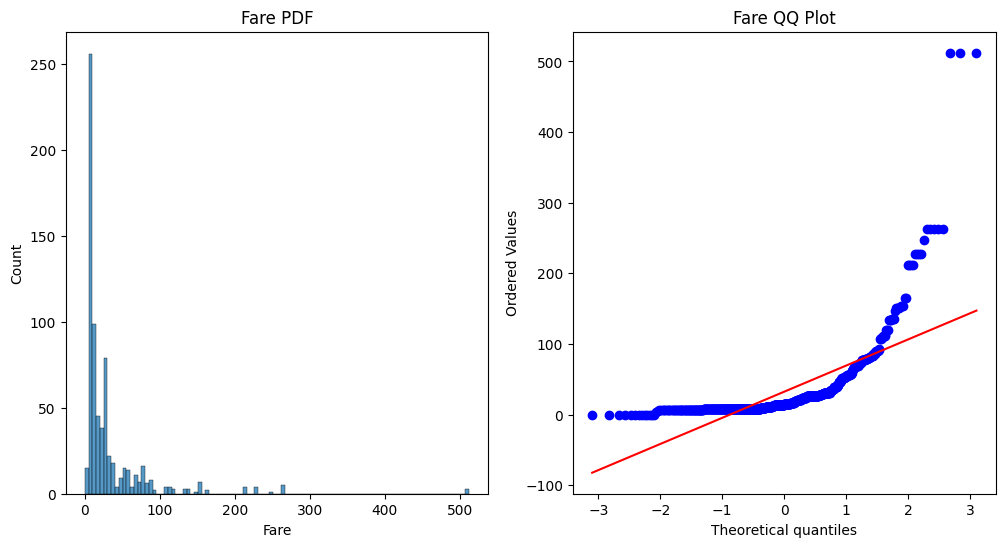

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

* We have to apply the log transformation here But we do not*  
First we check what is the effect on model when we do not apply any transformation
# * Without Transformation * 

In [20]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [21]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [22]:
pred1=clf.predict(X_test)
pred2=clf2.predict(X_test)

In [23]:
print("Logistic Regression Accuracy:",accuracy_score(y_test,pred1))
print("Decision Tree Classifier Accuracy:",accuracy_score(y_test,pred2))

Logistic Regression Accuracy: 0.6480446927374302
Decision Tree Classifier Accuracy: 0.6815642458100558


In [24]:
trf=FunctionTransformer(func=np.log1p)

Difference Between logp and log1p

1. in logp we do not add 1    logp(x)
2. in log1p we add 1 as      log1p(x+1)  Benefits: can also work with 0

In [25]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [42]:
X_train_transformed

array([[ 3.38439026, 45.5       ],
       [ 2.63905733, 23.        ],
       [ 2.18885633, 32.        ],
       ...,
       [ 2.71524426, 41.        ],
       [ 4.79579055, 14.        ],
       [ 4.36038795, 21.        ]], shape=(712, 2))

In [43]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

pred1=clf.predict(X_test_transformed)
pred2=clf2.predict(X_test_transformed)

print("Logistic Regression Accuracy:",accuracy_score(y_test,pred1))
print("Decision Tree Classifier Accuracy:",accuracy_score(y_test,pred2))

Logistic Regression Accuracy: 0.6703910614525139
Decision Tree Classifier Accuracy: 0.664804469273743


In [29]:
X_transformed=trf.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed, y, scoring= 'accuracy',cv=10)))
print('LD', np.mean(cross_val_score(clf2, X_transformed, y, scoring= 'accuracy',cv=10)))


LR 0.678027465667915
LD 0.6622097378277153


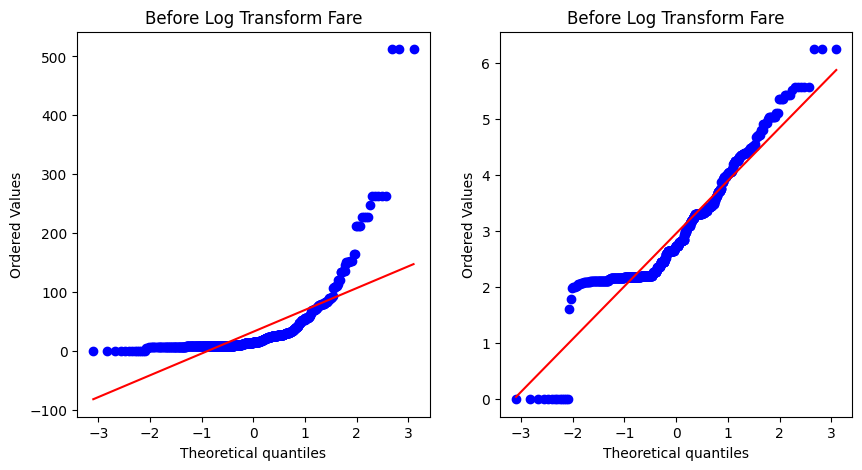

In [30]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Before Log Transform Fare')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Before Log Transform Fare')

plt.show()

 Log transform on 'Fare' looks good than the previous 

 But on the 'Age' previous one was better 

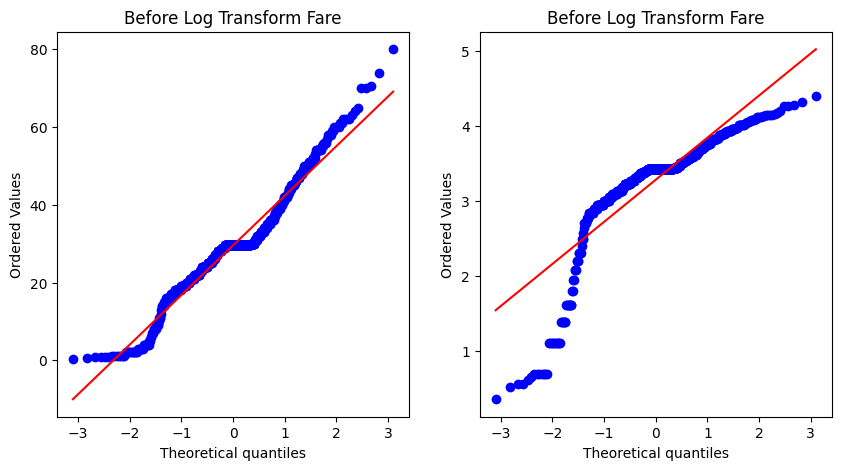

In [31]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Before Log Transform Fare')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Before Log Transform Fare')

plt.show()

## *SO we create the transformation that works on the Fare not the Age *


And then reapply the modelling 

In [33]:
trf2=ColumnTransformer(transformers=[
    ('log',FunctionTransformer(func=np.log1p),['Fare'])
    ], remainder='passthrough')


In [34]:
X_train_transformed=trf2.fit_transform(X_train)
X_test_transformed=trf2.transform(X_test)

In [35]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

pred1=clf.predict(X_test_transformed)
pred2=clf2.predict(X_test_transformed)

print("Logistic Regression Accuracy:",accuracy_score(y_test,pred1))
print("Decision Tree Classifier Accuracy:",accuracy_score(y_test,pred2))

Logistic Regression Accuracy: 0.6703910614525139
Decision Tree Classifier Accuracy: 0.6759776536312849


In [36]:
X_transformed2=trf2.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed2, y, scoring= 'accuracy',cv=10)))
print('LD', np.mean(cross_val_score(clf2, X_transformed2, y, scoring= 'accuracy',cv=10)))


LR 0.6712609238451936
LD 0.6588264669163546


In [46]:
def apply_transform(transform):
    X=df.iloc[:,1:3]
    y=df.iloc[:,0]

    trf=ColumnTransformer(transformers=[
        ('log', FunctionTransformer(func=transform), ['Fare'])
    ], remainder='passthrough')
    
    X_trans=trf.fit_transform(X)

    clf=LogisticRegression()

    print("Accuracy LR:", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))


    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    stats.probplot(X['Fare'], dist='norm',plot=plt)
    plt.title("Before Transform Fare")

    plt.subplot(1,2,2)
    stats.probplot(X_trans[:,0], dist='norm',plot=plt)
    plt.title("After Transform Fare")
    plt.show()


Accuracy LR: 0.6589013732833957


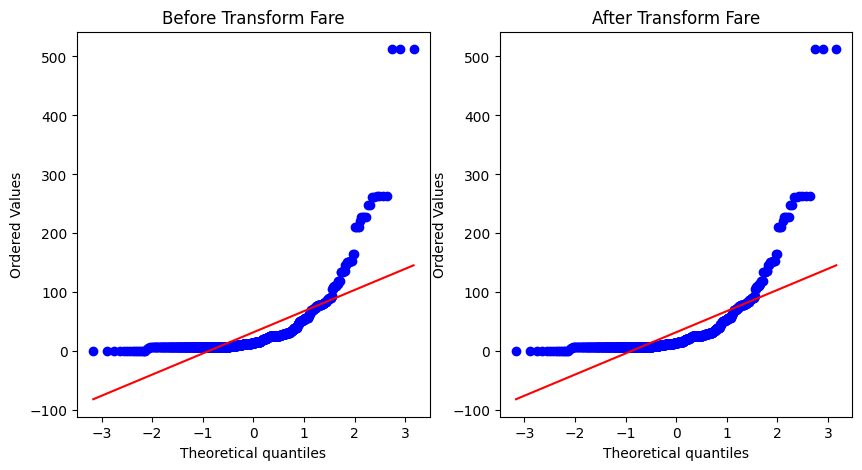

In [47]:
apply_transform(lambda x : x)

Accuracy LR: 0.6431335830212235


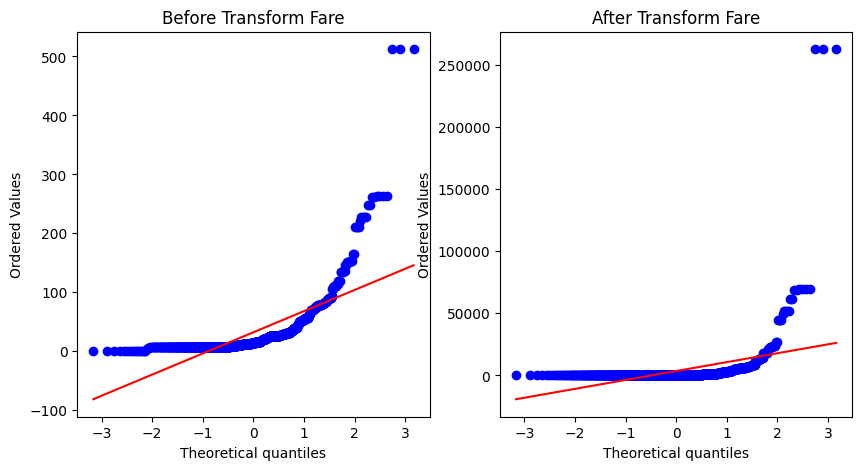

In [48]:
apply_transform(lambda x : x**2)


Accuracy LR: 0.6589013732833957


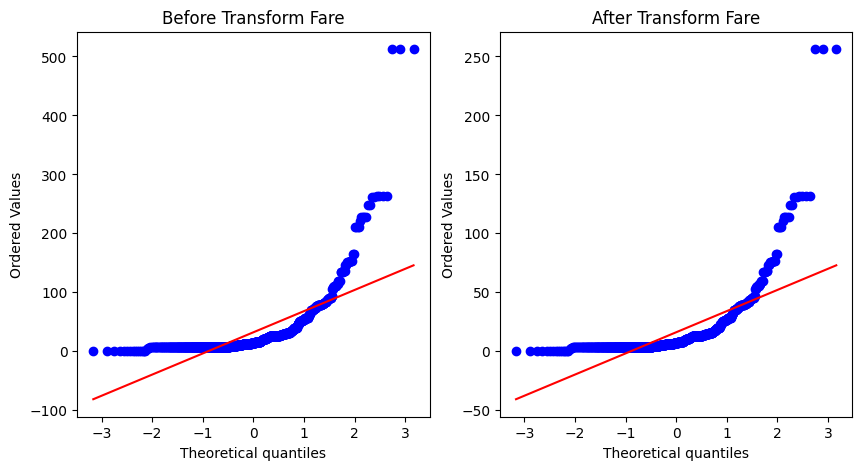

In [49]:
apply_transform(lambda x : x**1/2)


Accuracy LR: 0.61729088639201


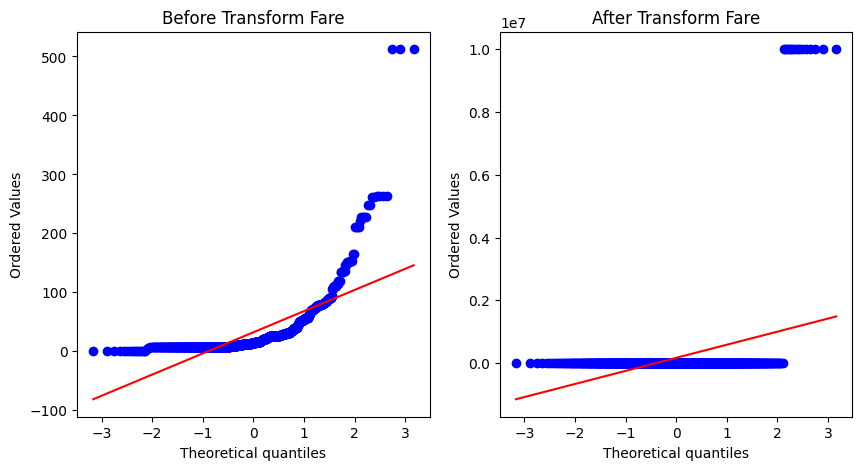

In [50]:
apply_transform(lambda x : 1/(x+0.0000001))
